In [73]:
# Import Required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

!pip install scikit-learn-intelex
from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.model_selection import train_test_split
from imblearn import over_sampling
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, StratifiedKFold,cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
import scipy.stats as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [74]:
# loading and reading the data

db2 = pd.read_csv('/content/diabetes.csv')

In [75]:
# Displaying the first five roles of the dataset

db2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Understanding the Dataset**
- Analysing, interpreting and gaining meaninful insight or information about the Data

In [76]:
#  Basic information about the data

# This data contains 768 rows and 9 features with all values in numerical format

db2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [77]:
# Checking for duplicate values
db2.duplicated().sum()

# There is no duplicate values in the data

0

In [78]:
# Check for missing values
db2.isnull().sum()
# The dataset contains no missing value.

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# **Exploratory Data Analysis (EDA)**

Since the Data is clean (void of duplicate and missing values), I will then explore to understand more insights to see trends and patterns in relation to diabetes progression.

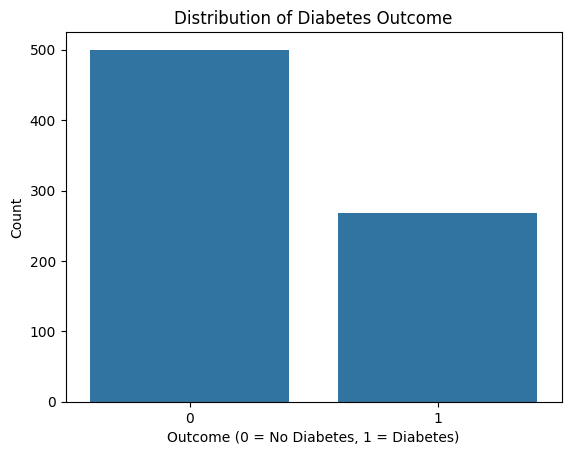

In [79]:
# Count plot for the target variable (Outcome)
sns.countplot(x='Outcome', data=db2)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()

The dataset shows a class imbalance where the number of non-diabetic cases (Class 0) is much larger than the number of diabetic cases (Class 1). To ensure better performance of the models, the class imbalance has to be addressed using the resampling technignue through, SMOTE (Synthetic Minority Over-sampling Technique). This is used to generate synthetic data for the minority class.

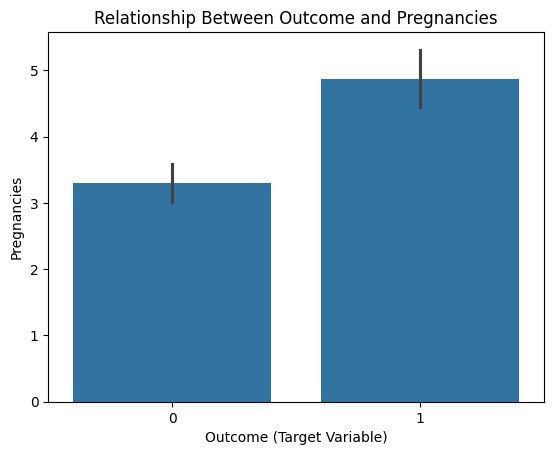

In [80]:
# Outcome vs Pregnancies
sns.barplot(x='Outcome', y='Pregnancies', data=db2)
plt.title("Relationship Between Outcome and Pregnancies")
plt.xlabel("Outcome (Target Variable)")
plt.ylabel("Pregnancies")
plt.show()

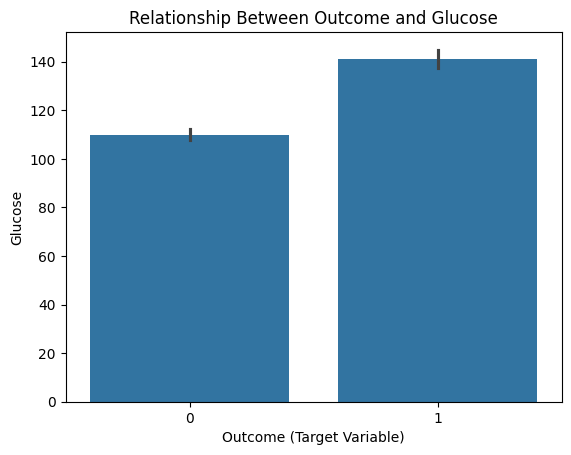

In [81]:
# Outcome vs Glucose
sns.barplot(x='Outcome', y='Glucose', data=db2)
plt.title("Relationship Between Outcome and Glucose")
plt.xlabel("Outcome (Target Variable)")
plt.ylabel("Glucose")
plt.show()

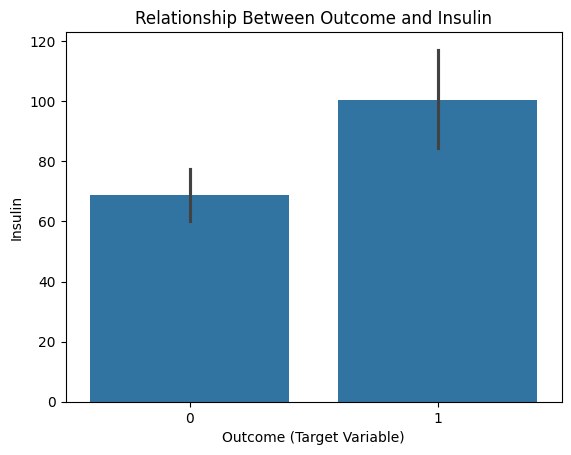

In [82]:
# Outcome vs Insulin
sns.barplot(x='Outcome', y='Insulin', data=db2)
plt.title("Relationship Between Outcome and Insulin")
plt.xlabel("Outcome (Target Variable)")
plt.ylabel("Insulin")
plt.show()

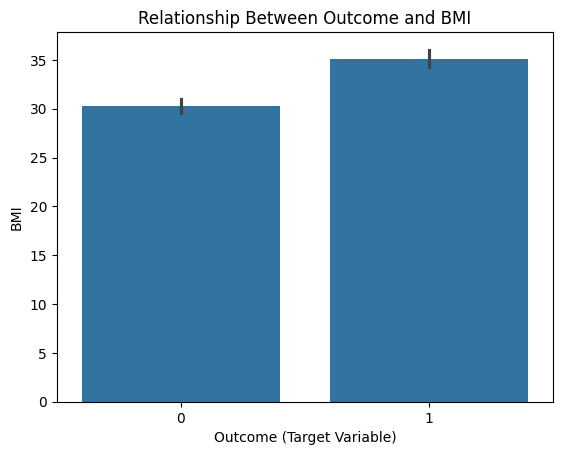

In [83]:
# Outcome vs BMI
sns.barplot(x='Outcome', y='BMI', data=db2)
plt.title("Relationship Between Outcome and BMI")
plt.xlabel("Outcome (Target Variable)")
plt.ylabel("BMI")
plt.show()

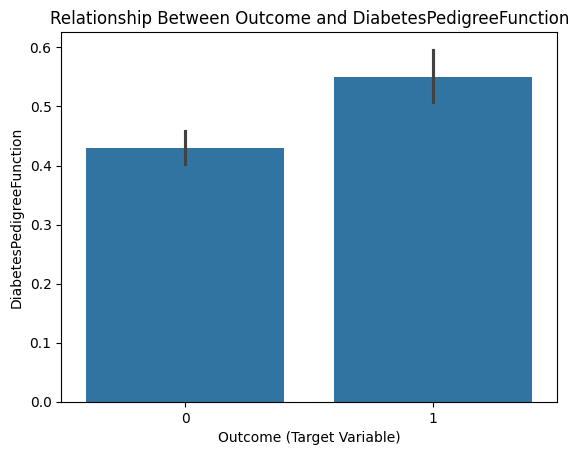

In [84]:
# Outcome vs DiabetesPedigreeFunction
sns.barplot(x='Outcome', y='DiabetesPedigreeFunction', data=db2)
plt.title("Relationship Between Outcome and DiabetesPedigreeFunction")
plt.xlabel("Outcome (Target Variable)")
plt.ylabel("DiabetesPedigreeFunction")
plt.show()

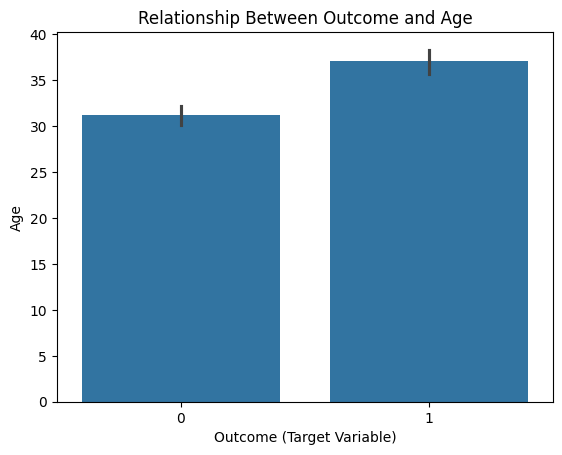

In [85]:
# Outcome vs Age
sns.barplot(x='Outcome', y='Age', data=db2)
plt.title("Relationship Between Outcome and Age")
plt.xlabel("Outcome (Target Variable)")
plt.ylabel("Age")
plt.show()

Text(0.5, 1.0, 'Correlation Analysis')

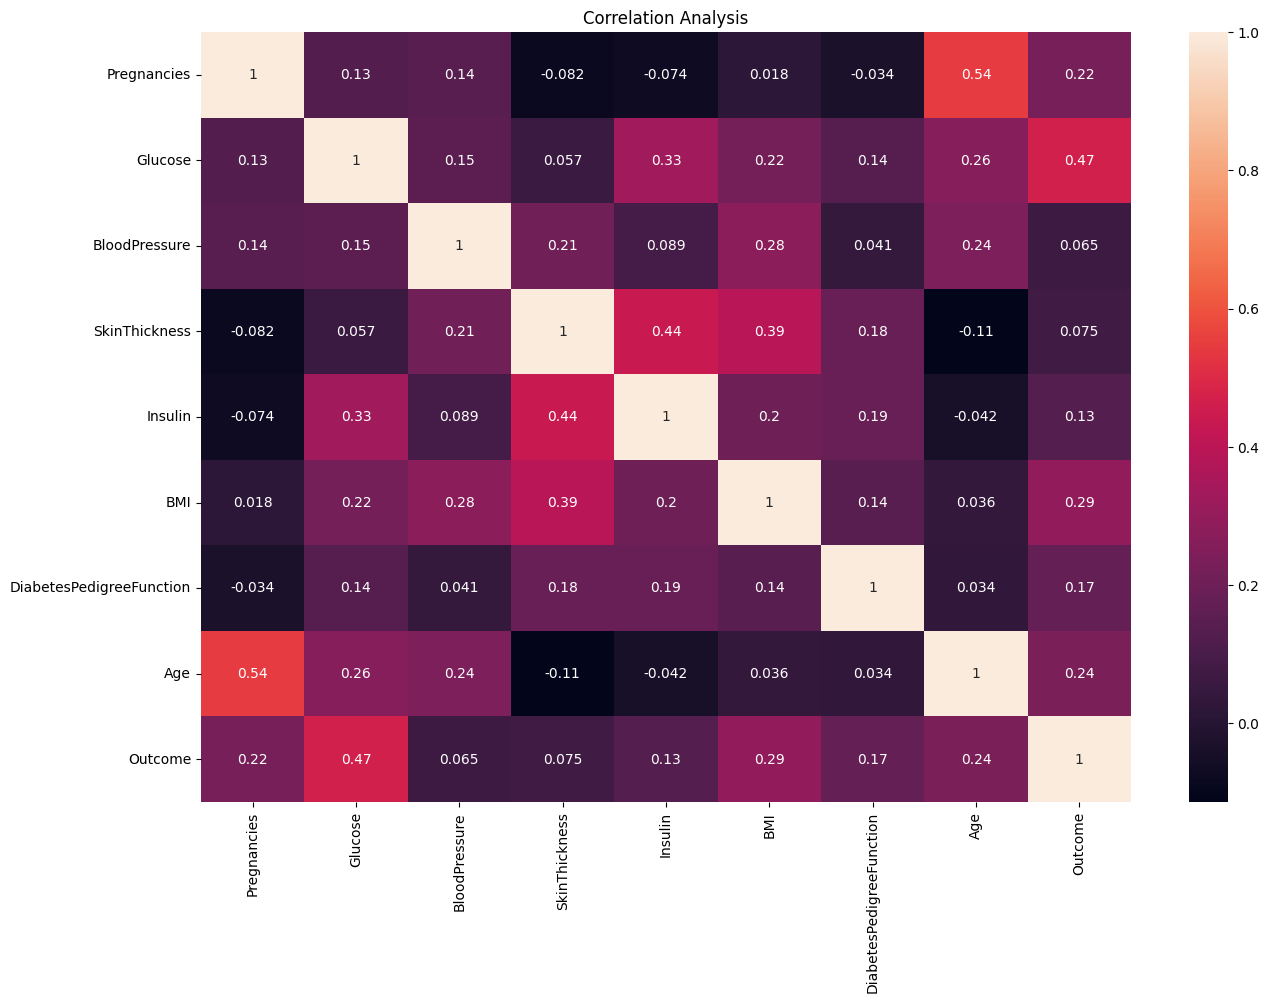

In [86]:
# Using correlation analysis to investigate the relationship between variables.
plt.figure(figsize=(15,10))
sns.heatmap(db2.corr(), annot=True)
plt.title("Correlation Analysis")

# **Preprocessing the Data**

In [87]:
# Splitting  the data into target and independent variable
X=db2.drop(['Outcome'], axis=1)
y= db2['Outcome']

In [88]:
# Using SMOTE method to balance the data, to avoid bias in the model.

# Initializing the sampling object
sm=over_sampling.SMOTE()

# Applying the sampling to the dataset
X,y=sm.fit_resample(X,y)

<Axes: xlabel='Outcome', ylabel='count'>

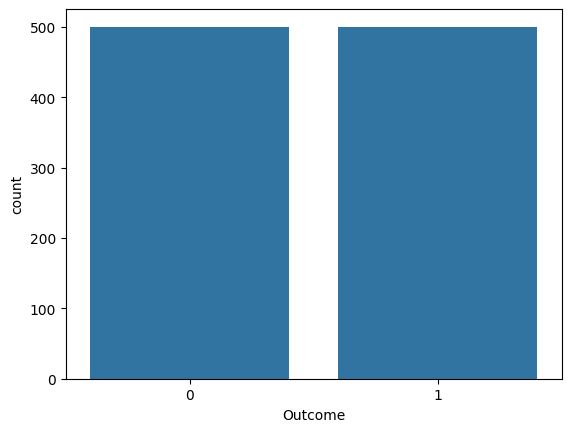

In [89]:
# Checking the data after using the SMOTE

sns.countplot(x=y, data=db2)

In [90]:
# Total number of rows  after using the SMOTE
X.shape

(1000, 8)

In [91]:
# Train-test split using the 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [92]:
# Normalizing the features by scaling them to be within the same scale
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

# **Building the Model**

I will now employ the three different algorithms to build the models and evaluate their performance.

### **Building the Random Forest Model**

In [93]:
# Objectifying the Random Forest Model
random=RandomForestClassifier(random_state=42)

# Fitting the Random Forest Model  to learn  the training data
random.fit(x_train_scaled,y_train)

# How well did the Random model learn the data
train_random_accuracy =random.score(x_train_scaled,y_train)

# Making prediction on the test data
random_prediction = random.predict(x_test_scaled)

train_random_accuracy


1.0

## Evaluating the performnace of the Random Forest model on test data

In [94]:
# Evaluating the Random model prediction on test data
test_random_accuracy=metrics.accuracy_score(y_test, random_prediction)

classification_random_report = metrics.classification_report(y_test, random_prediction)

random_confusion_matrix = metrics.confusion_matrix(y_test, random_prediction)

test_random_accuracy

0.8

In [95]:
print(classification_random_report)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        91
           1       0.82      0.82      0.82       109

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



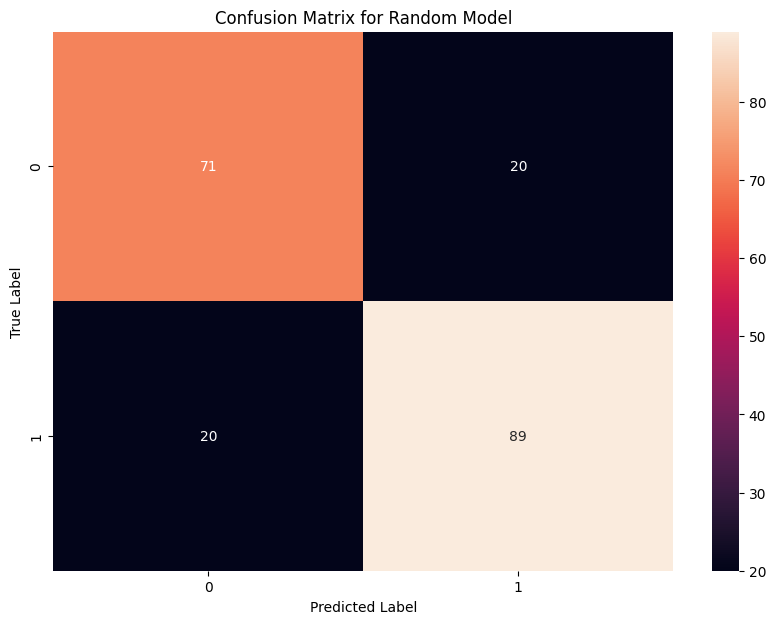

In [96]:
# Visualizing  the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(random_confusion_matrix, annot=True, fmt="d")
plt.title('Confusion Matrix for Random Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### **Building the XgBoost Model**

In [97]:
# Objectifying the Xgboost Model

xg=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Fitting the Xgboost Model  to learn  the training data
xg.fit(x_train_scaled,y_train)

# How well did the Xgboost Model learn the data
train_xg_accuracy = xg.score(x_train_scaled,y_train)

# Making prediction on the test data
xg_prediction = xg.predict(x_test_scaled)

print(train_xg_accuracy)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:09:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


1.0


## Evaluating the performnace of the Xgboost model on test data

In [98]:
# Evaluating the Xgboost model prediction on test data
test_xg_accuracy=metrics.accuracy_score(y_test, xg_prediction)

classification_xg_report = metrics.classification_report(y_test, xg_prediction)

xg_confusion_matrix = metrics.confusion_matrix(y_test, xg_prediction)

print(test_xg_accuracy)

0.79


In [99]:
print(classification_xg_report)

              precision    recall  f1-score   support

           0       0.78      0.75      0.76        91
           1       0.80      0.83      0.81       109

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



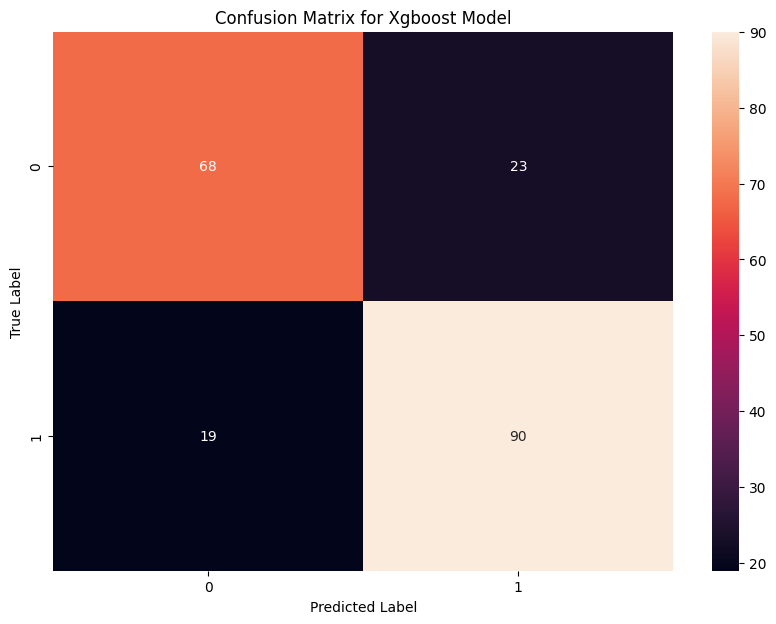

In [100]:
# Visualizing  the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(xg_confusion_matrix, annot=True, fmt="d")
plt.title('Confusion Matrix for Xgboost Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### **Building the Support Vector Model**

In [101]:
# Objectifying the Support Vector Model
support=LinearSVC(random_state=42)

# Fitting the Model  to learn  the training data
support.fit(x_train_scaled,y_train)

# How well did the model learn the data
train_support_accuracy =support.score(x_train_scaled,y_train)

# Making prediction on the test data
support_prediction =support.predict(x_test_scaled)

print(train_support_accuracy)

0.7525


### Evaluating the performnace of the Support model on test data

In [102]:
# Evaluating the model prediction on test data
test_support_accuracy=metrics.accuracy_score(y_test, support_prediction)

classification_support_report = metrics.classification_report(y_test, support_prediction)

support_confusion_matrix = metrics.confusion_matrix(y_test, support_prediction)

print(test_support_accuracy)

0.72


In [103]:
print(classification_support_report)

              precision    recall  f1-score   support

           0       0.67      0.77      0.71        91
           1       0.78      0.68      0.73       109

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.73      0.72      0.72       200



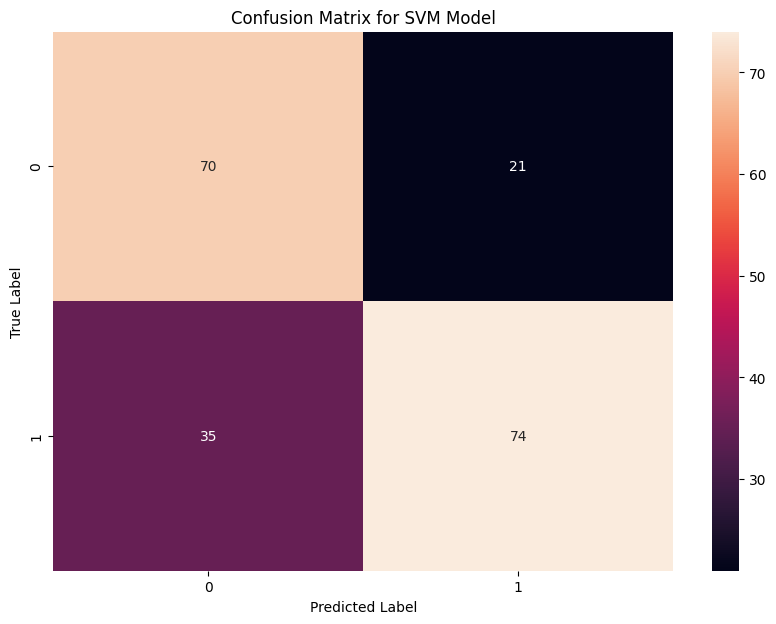

In [104]:
# Visualizing  the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(support_confusion_matrix, annot=True, fmt="d")
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()